# CUSTOMER CHURN PREDICTION

In [1]:
pwd

'C:\\Users\\Ranjith P\\Desktop'

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Train & Test datasets

In [3]:
#Importing train & test datasets:

train_data=pd.read_csv("Train_data.csv")

test_data=pd.read_csv("Test_data.csv")

# Data Understanding

In [4]:
train_data.head(3)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.


In [5]:
test_data.head(3)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,HI,101,510,354-8815,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,False.
1,MT,137,510,381-7211,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,False.
2,OH,103,408,411-9481,no,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,False.


In [6]:
#Dropping 3 variables named 'state', 'area code', 'phone number'

train=train_data.drop(['state', 'area code', 'phone number'], axis=1)

test=test_data.drop(['state', 'area code', 'phone number'], axis=1)

In [7]:
print(train.columns)

print(test.columns)

Index(['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'number customer service calls', 'Churn'],
      dtype='object')
Index(['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'number customer service calls', 'Churn'],
      dtype='object')


In [8]:
#Summary

train.describe(include="all")

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
count,3333.000000,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False.
freq,NaN,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,101.064806,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,39.822106,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,74.000000,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,101.000000,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,127.000000,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


In [9]:
train.shape

(3333, 18)

In [10]:
train.dtypes

account length                     int64
international plan                object
voice mail plan                   object
number vmail messages              int64
total day minutes                float64
total day calls                    int64
total day charge                 float64
total eve minutes                float64
total eve calls                    int64
total eve charge                 float64
total night minutes              float64
total night calls                  int64
total night charge               float64
total intl minutes               float64
total intl calls                   int64
total intl charge                float64
number customer service calls      int64
Churn                             object
dtype: object

In [11]:
train.columns

Index(['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'number customer service calls', 'Churn'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014AA85A3048>,
      dtype=object)

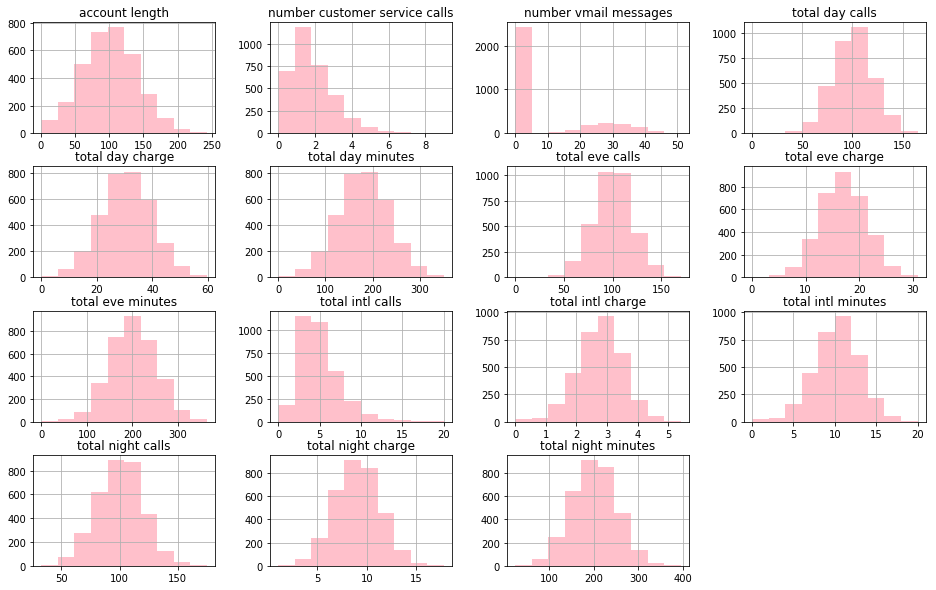

In [12]:
#Data Visualizations:
plt.rcParams["figure.figsize"] = [16,9]
train.hist(figsize = (16,10),color="pink")

# Preparation of Train Data

# Detecting Missing Values on Train Data

In [13]:
#Checking Missing value:

mv=pd.DataFrame(train.isnull().sum())

mv

,0
account length,0
international plan,0
voice mail plan,0
number vmail messages,0
total day minutes,0
total day calls,0
total day charge,0
total eve minutes,0
total eve calls,0
total eve charge,0


In [14]:
#The above dataframe and th edescribe function also shows that there is no missing value in train data.

# Outlier Detection and Treatment on Train Data

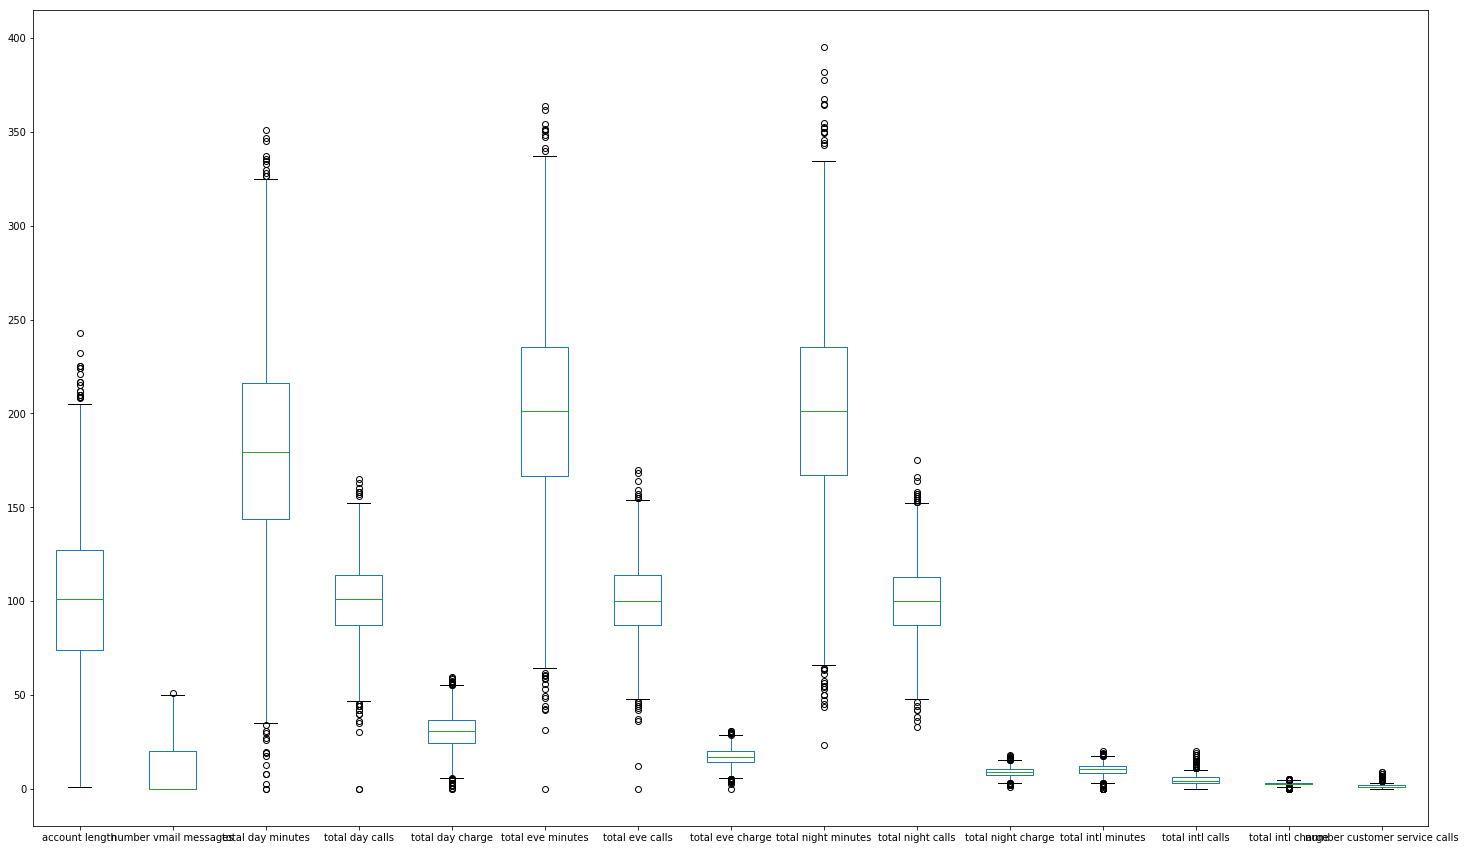

In [15]:
#Outlier Analysis and Treatment:
#Box-plot visualisation:

train.plot(kind='box', figsize=[25,15])

In [16]:
train_numeric_names=['account length','number vmail messages', 'total day minutes', 'total day calls',
                    'total day charge', 'total eve minutes', 'total eve calls',
                    'total eve charge', 'total night minutes', 'total night calls',
                    'total night charge', 'total intl minutes', 'total intl calls',
                    'total intl charge', 'number customer service calls']

train_numeric_names

['account length',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'number customer service calls']

In [17]:
for i in train_numeric_names:
    print(i)
    q75,q25=np.percentile(train.loc[:,i],[75,25])
    iqr=q75-q25
    
    min=q25-(1.5*iqr)
    max=q75+(1.5*iqr)
    print(min)
    print(max)

    train=train.drop(train[train.loc[:,i]<min].index)
    train=train.drop(train[train.loc[:,i]>max].index)
    

account length
-5.5
206.5
number vmail messages
-30.0
50.0
total day minutes
34.83749999999992
325.1375000000001
total day calls
46.5
154.5
total day charge
6.125
55.125
total eve minutes
64.42499999999995
337.82500000000005
total eve calls
46.5
154.5
total eve charge
5.5550000000000015
28.634999999999998
total night minutes
64.3
337.90000000000003
total night calls
48.0
152.0
total night charge
2.9449999999999985
15.145000000000001
total intl minutes
3.1000000000000005
17.5
total intl calls
-1.5
10.5
total intl charge
0.8949999999999996
4.695
number customer service calls
-0.5
3.5


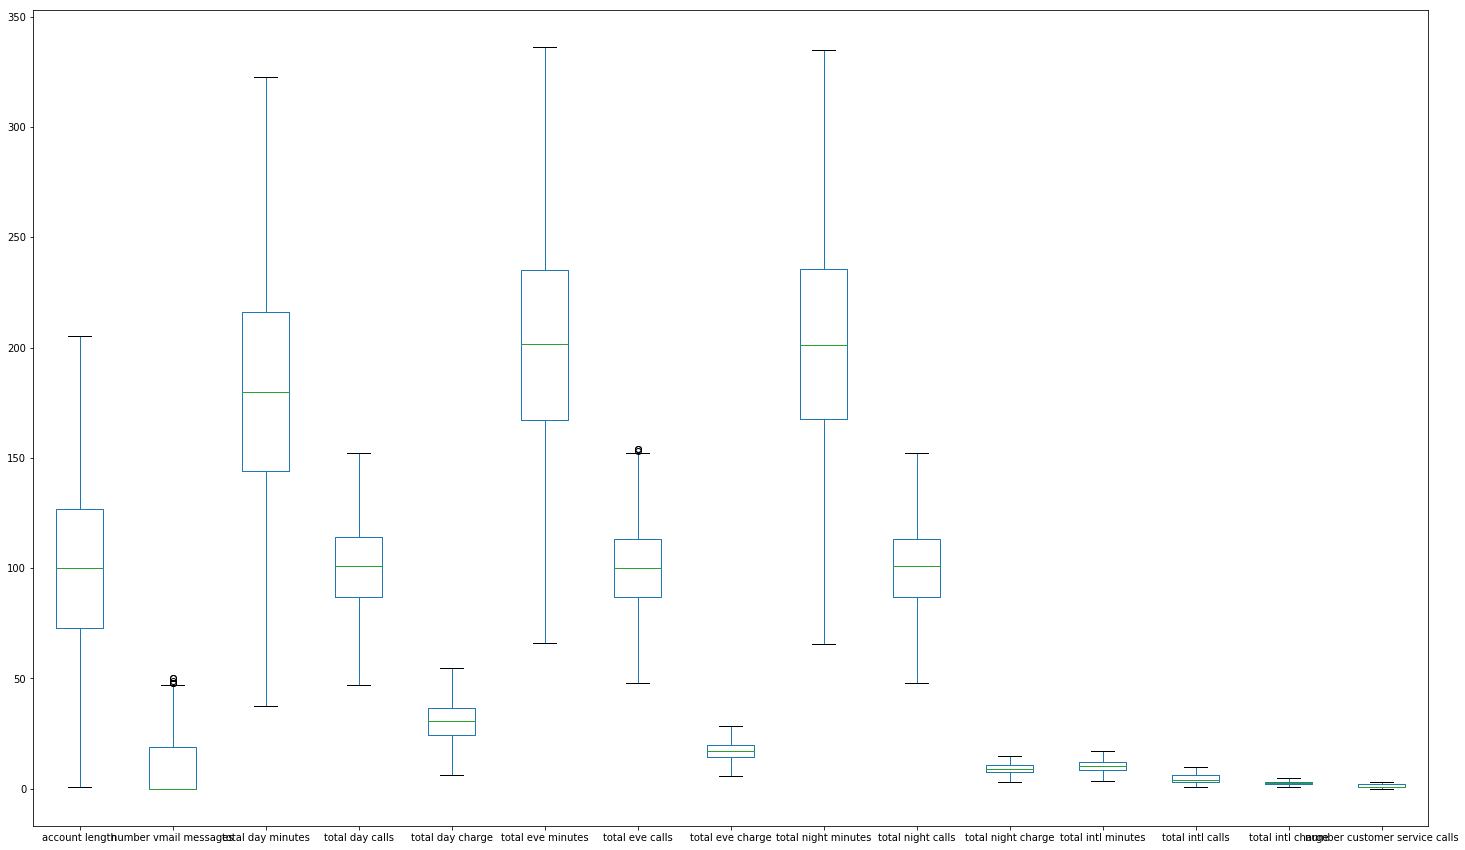

In [18]:
#Box-plot visualisation after removing outliers:

train.plot(kind='box', figsize=[25,15])

# Transforming Categorical variables

In [19]:
train['voice mail plan'] = train['voice mail plan'].map(lambda x: x.strip())

train['international plan'] =train['international plan'].map(lambda x: x.strip())

train['Churn'] = train['Churn'].map(lambda x: x.strip())

In [20]:
# Convert the categorical variable into numeric variable:

train['voice mail plan'] = train['voice mail plan'].map({'no':0, 'yes':1})

train['international plan'] = train['international plan'].map({'no':0, 'yes':1})

train['Churn'] = train['Churn'].map({'False.':0, 'True.':1})

train.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,118,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0


In [21]:
train["Churn"]=train["Churn"].astype(object)

In [22]:
train.dtypes

account length                     int64
international plan                 int64
voice mail plan                    int64
number vmail messages              int64
total day minutes                float64
total day calls                    int64
total day charge                 float64
total eve minutes                float64
total eve calls                    int64
total eve charge                 float64
total night minutes              float64
total night calls                  int64
total night charge               float64
total intl minutes               float64
total intl calls                   int64
total intl charge                float64
number customer service calls      int64
Churn                             object
dtype: object

# Feature Selection

In [23]:
#Feature Selection:
#Using correlation:
train_num_names=train.select_dtypes(['int64','float64']).columns

train_corr=train.loc[:,train_num_names]

train_corr.shape

correlation_train=train_corr.corr()

correlation_train

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls
account length,1.000000,0.020833,0.010114,0.003086,0.006057,0.042087,0.006055,-0.012879,0.022478,-0.012861,-0.003768,-0.004408,-0.003778,0.027345,0.026743,0.027393,-0.004271
international plan,0.020833,1.000000,0.004966,0.008786,0.055557,0.024921,0.055559,0.003243,-0.003003,0.003248,-0.026875,0.007371,-0.026869,0.040000,0.004553,0.039918,-0.034693
voice mail plan,0.010114,0.004966,1.000000,0.956640,0.000678,-0.014132,0.000676,0.010507,-0.010914,0.010520,0.006168,0.010364,0.006153,-0.000224,-0.016260,-0.000186,-0.036889
number vmail messages,0.003086,0.008786,0.956640,1.000000,0.005794,-0.011522,0.005792,0.005153,-0.010851,0.005169,0.011929,0.001861,0.011911,0.004888,-0.010133,0.004925,-0.032004
total day minutes,0.006057,0.055557,0.000678,0.005794,1.000000,0.013192,1.000000,0.003975,0.006403,0.003962,0.003883,0.000444,0.003871,-0.009537,-0.018634,-0.009544,-0.007811
total day calls,0.042087,0.024921,-0.014132,-0.011522,0.013192,1.000000,0.013195,-0.015000,0.020074,-0.014990,0.024444,-0.005928,0.024428,0.004092,0.003307,0.004197,-0.034233
total day charge,0.006055,0.055559,0.000676,0.005792,1.000000,0.013195,1.000000,0.003980,0.006403,0.003967,0.003879,0.000448,0.003867,-0.009536,-0.018634,-0.009544,-0.007818
total eve minutes,-0.012879,0.003243,0.010507,0.005153,0.003975,-0.015000,0.003980,1.000000,-0.022254,1.000000,-0.013552,-0.010028,-0.013571,-0.022265,0.018972,-0.022322,-0.032129
total eve calls,0.022478,-0.003003,-0.010914,-0.010851,0.006403,0.020074,0.006403,-0.022254,1.000000,-0.022254,0.015365,0.005548,0.015419,0.008014,-0.000222,0.008006,-0.020491
total eve charge,-0.012861,0.003248,0.010520,0.005169,0.003962,-0.014990,0.003967,1.000000,-0.022254,1.000000,-0.013563,-0.010015,-0.013583,-0.022273,0.018974,-0.022331,-0.032128


In [24]:
correlation_train.style.background_gradient(cmap='summer')

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls
account length,1,0.0208327,0.0101142,0.00308635,0.00605682,0.042087,0.00605497,-0.012879,0.0224776,-0.0128613,-0.00376814,-0.0044084,-0.0037775,0.0273449,0.0267432,0.0273934,-0.00427094
international plan,0.0208327,1,0.00496562,0.00878618,0.0555571,0.0249213,0.0555589,0.00324282,-0.00300287,0.00324799,-0.026875,0.00737094,-0.0268694,0.0400002,0.00455297,0.0399181,-0.0346926
voice mail plan,0.0101142,0.00496562,1,0.95664,0.000677823,-0.0141319,0.000676292,0.0105075,-0.0109142,0.01052,0.00616803,0.010364,0.00615259,-0.000224161,-0.0162598,-0.000186475,-0.0368891
number vmail messages,0.00308635,0.00878618,0.95664,1,0.00579417,-0.011522,0.00579171,0.0051532,-0.0108512,0.0051688,0.0119289,0.00186075,0.0119113,0.004888,-0.010133,0.00492477,-0.0320038
total day minutes,0.00605682,0.0555571,0.000677823,0.00579417,1,0.0131918,1,0.00397473,0.00640318,0.00396169,0.00388349,0.000443686,0.00387146,-0.00953679,-0.0186343,-0.00954436,-0.00781084
total day calls,0.042087,0.0249213,-0.0141319,-0.011522,0.0131918,1,0.0131952,-0.0149999,0.0200736,-0.0149899,0.0244436,-0.00592843,0.0244276,0.00409211,0.00330706,0.00419744,-0.0342331
total day charge,0.00605497,0.0555589,0.000676292,0.00579171,1,0.0131952,1,0.00398008,0.00640267,0.00396705,0.00387911,0.000447681,0.00386707,-0.00953633,-0.0186336,-0.0095439,-0.00781784
total eve minutes,-0.012879,0.00324282,0.0105075,0.0051532,0.00397473,-0.0149999,0.00398008,1,-0.0222539,1,-0.0135516,-0.0100278,-0.0135715,-0.0222648,0.0189722,-0.0223221,-0.0321287
total eve calls,0.0224776,-0.00300287,-0.0109142,-0.0108512,0.00640318,0.0200736,0.00640267,-0.0222539,1,-0.0222544,0.0153648,0.00554836,0.015419,0.00801357,-0.000222188,0.00800561,-0.0204912
total eve charge,-0.0128613,0.00324799,0.01052,0.0051688,0.00396169,-0.0149899,0.00396705,1,-0.0222544,1,-0.0135634,-0.0100155,-0.0135832,-0.0222732,0.0189739,-0.0223305,-0.0321283


In [25]:
#Dropping some multicollineared variables to get rid of multicollinearity:

train=train.drop(['voice mail plan', 'total day minutes', 'total eve minutes','total night minutes','total intl minutes'], axis=1)

In [26]:
train.shape

(2797, 13)

# Feature Scaling

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014AAA7F62B0>,
      dtype=object)

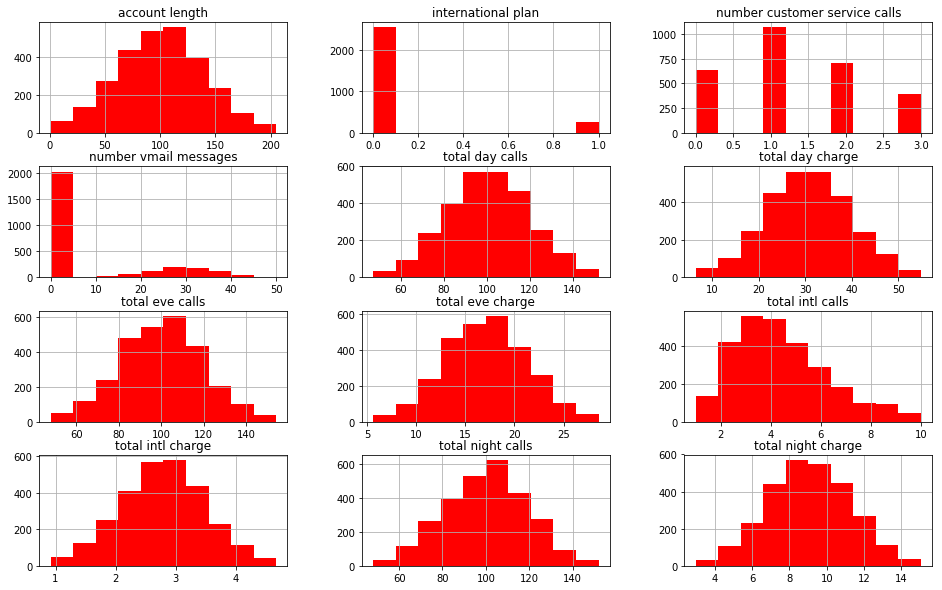

In [27]:
#Feature Scaling:
#Visualising the numerical data in histogram:

plt.rcParams["figure.figsize"] = [16,9]

train.hist(figsize = (16,10),color="red")

In [28]:
#train['number customer service calls'] =train['number customer service calls'].astype('int')

#train['number vmail messages'] =train['number vmail messages'].astype('int')

#train['total intl calls'] =train['total intl calls'].astype('int')

In [29]:
# Normalisation for Train Dataset
train_skew_names=["number vmail messages","total intl calls","number customer service calls"]

minVec = train[train_skew_names].min().copy()
maxVec = train[train_skew_names].max().copy()
train[train_skew_names] = (train[train_skew_names]-minVec)/(maxVec-minVec)


#Performing feature scaling:
train_scaling_vars=['account length','total day calls','total day charge', 'total eve calls',
                   'total eve charge', 'total night calls','total night charge','total intl charge']

for i in train_scaling_vars:
    print(i)
    train[i]=(train[i]-train[i].mean())/train[i].std()
    


account length
total day calls
total day charge
total eve calls
total eve charge
total night calls
total night charge
total intl charge


In [30]:
train.head()

,account length,international plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,number customer service calls,Churn
0,0.701970,0,0.50,0.488626,1.618559,-0.053074,-0.079093,-0.474867,0.890671,0.222222,-0.120632,0.333333,0
1,0.168013,0,0.52,1.162740,-0.350087,0.154982,-0.117474,0.154986,1.090918,0.222222,1.307249,0.333333,0
2,0.930808,0,0.00,0.696046,1.205815,0.519078,-1.633533,0.207474,-0.788675,0.444444,0.721818,0.000000,0
4,-0.645635,1,0.00,0.644191,-0.252773,1.143244,-1.079404,1.099765,-0.292608,0.222222,-0.077796,1.000000,0
5,0.447705,1,0.00,-0.133633,0.825508,0.050954,0.393476,0.942302,0.057825,0.555556,-1.548513,0.000000,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014AAAB01518>,
      dtype=object)

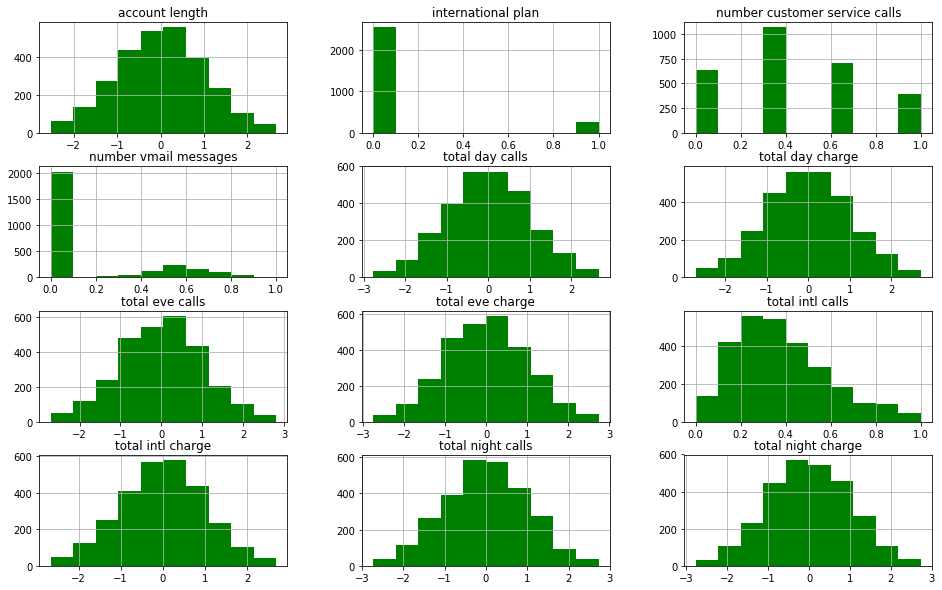

In [31]:
#Visualizing the features after feature scaling:

plt.rcParams["figure.figsize"] = [16,9]

train.hist(figsize = (16,10),color="green")

In [32]:
#Transform the variables dtype:

train['international plan'] = train['international plan'].astype('int')

train['Churn'] = train['Churn'].astype('int')

In [33]:
train.dtypes

account length                   float64
international plan                 int32
number vmail messages            float64
total day calls                  float64
total day charge                 float64
total eve calls                  float64
total eve charge                 float64
total night calls                float64
total night charge               float64
total intl calls                 float64
total intl charge                float64
number customer service calls    float64
Churn                              int32
dtype: object

# Looking at the proprotion of target class

0    2493
1     304
Name: Churn, dtype: int64


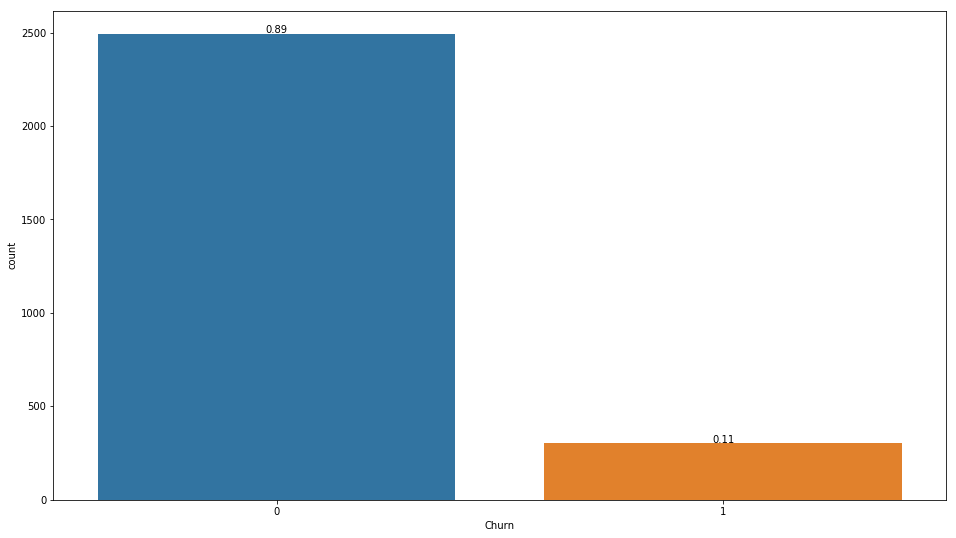

In [34]:
#Looking at the proportion of target class:
print(train.Churn.value_counts())
churn_proportion=sns.countplot(x="Churn", data=train)

total = float(len(train))
for p in churn_proportion.patches:
    height = p.get_height()
    churn_proportion.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 

In [35]:
train.describe(include="all")

,account length,international plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,number customer service calls,Churn
count,2.797000e+03,2797.000000,2797.000000,2.797000e+03,2.797000e+03,2.797000e+03,2.797000e+03,2.797000e+03,2.797000e+03,2797.000000,2.797000e+03,2797.000000,2797.000000
mean,-1.209853e-16,0.095459,0.162624,8.974667e-17,-8.374106e-15,-2.605075e-16,-1.648703e-15,-6.446200e-17,-3.387351e-15,0.367974,1.339015e-14,0.435467,0.108688
std,1.000000e+00,0.293901,0.274144,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.230437,1.000000e+00,0.325151,0.311303
min,-2.527197e+00,0.000000,0.000000,-2.778232e+00,-2.705750e+00,-2.705779e+00,-2.758583e+00,-2.731839e+00,-2.772942e+00,0.000000,-2.662260e+00,0.000000,0.000000
25%,-6.964882e-01,0.000000,0.000000,-7.040364e-01,-6.845326e-01,-6.772398e-01,-6.955913e-01,-6.848177e-01,-6.885511e-01,0.222222,-6.632270e-01,0.333333,0.000000
50%,-9.972428e-03,0.000000,0.000000,2.193219e-02,-3.336450e-03,-1.059989e-03,2.467439e-03,5.001066e-02,-1.339125e-03,0.333333,-6.401726e-03,0.333333,0.000000
75%,6.765433e-01,0.000000,0.380000,6.960459e-01,6.845710e-01,6.751198e-01,6.885320e-01,6.798635e-01,7.086282e-01,0.555556,6.932600e-01,0.666667,0.000000
max,2.659811e+00,1.000000,1.000000,2.666532e+00,2.710263e+00,2.807687e+00,2.746726e+00,2.726885e+00,2.733856e+00,1.000000,2.692293e+00,1.000000,1.000000


In [36]:
train.head()

,account length,international plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,number customer service calls,Churn
0,0.701970,0,0.50,0.488626,1.618559,-0.053074,-0.079093,-0.474867,0.890671,0.222222,-0.120632,0.333333,0
1,0.168013,0,0.52,1.162740,-0.350087,0.154982,-0.117474,0.154986,1.090918,0.222222,1.307249,0.333333,0
2,0.930808,0,0.00,0.696046,1.205815,0.519078,-1.633533,0.207474,-0.788675,0.444444,0.721818,0.000000,0
4,-0.645635,1,0.00,0.644191,-0.252773,1.143244,-1.079404,1.099765,-0.292608,0.222222,-0.077796,1.000000,0
5,0.447705,1,0.00,-0.133633,0.825508,0.050954,0.393476,0.942302,0.057825,0.555556,-1.548513,0.000000,0


# Handling Test Data

# Understanding Test Data

In [37]:
#Now, Preparing the test data:
#EXploratory data analysis of test data:
test.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,101,no,no,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,False.
1,137,no,no,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,False.
2,103,no,yes,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,False.
3,99,no,no,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,False.
4,108,no,no,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,False.


In [38]:
test.shape

(1667, 18)

In [39]:
test.dtypes

account length                     int64
international plan                object
voice mail plan                   object
number vmail messages              int64
total day minutes                float64
total day calls                    int64
total day charge                 float64
total eve minutes                float64
total eve calls                    int64
total eve charge                 float64
total night minutes              float64
total night calls                  int64
total night charge               float64
total intl minutes               float64
total intl calls                   int64
total intl charge                float64
number customer service calls      int64
Churn                             object
dtype: object

# Missing Value Analysis on Test Data

In [40]:
#Checking Missing value:

mvt=pd.DataFrame(test.isnull().sum())

mvt

,0
account length,0
international plan,0
voice mail plan,0
number vmail messages,0
total day minutes,0
total day calls,0
total day charge,0
total eve minutes,0
total eve calls,0
total eve charge,0


# Outlier Analysis and Imputation on Test Data

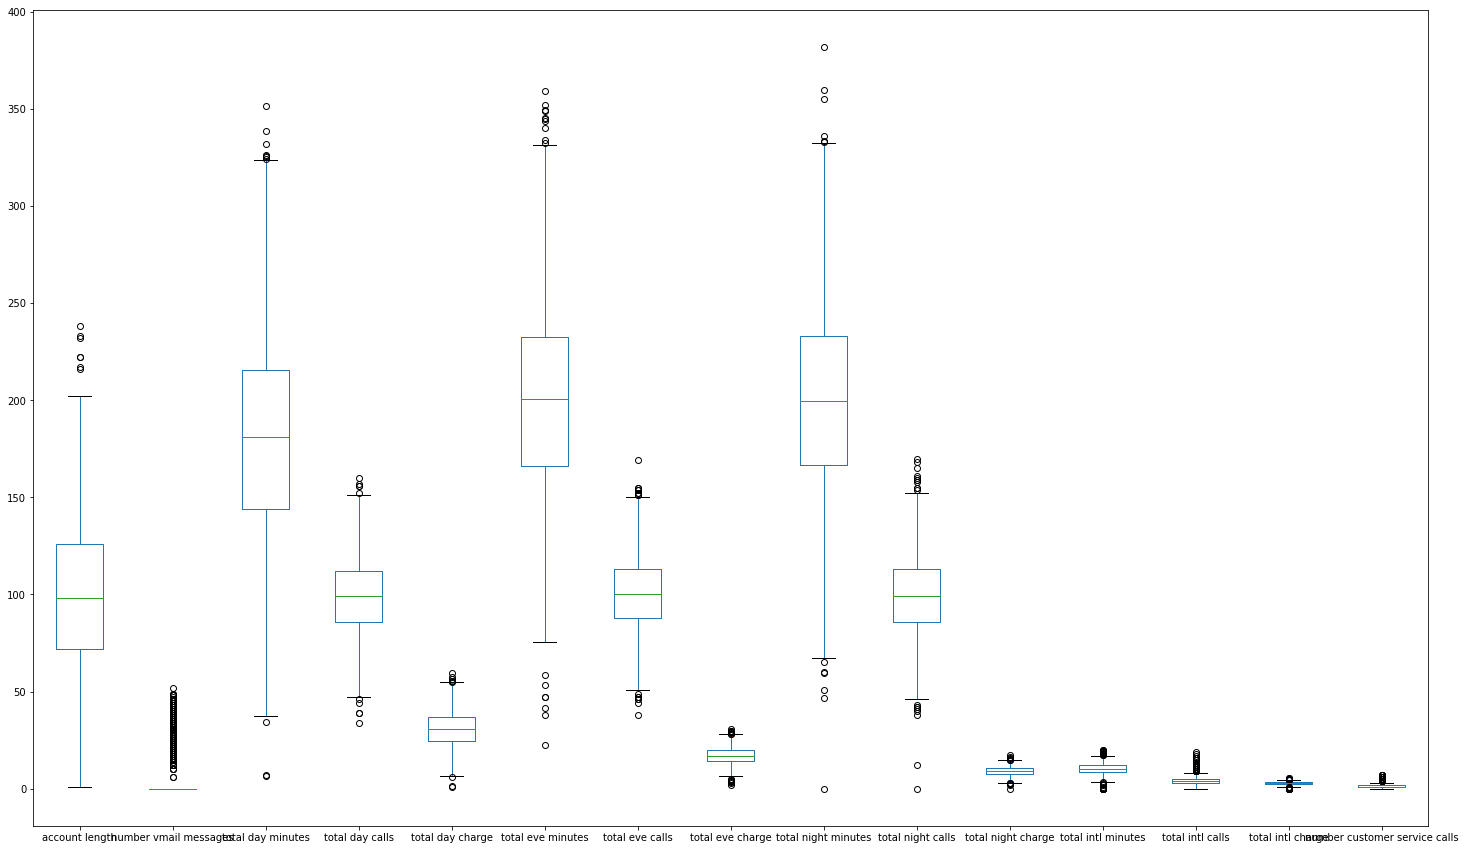

In [41]:
#Box-plot visualisation:

test.plot(kind='box', figsize=[25,15])

# Transforming Categorical variables on Test Data

In [42]:
#Transfroming categorical variables:

test['voice mail plan'] = test['voice mail plan'].map(lambda x: x.strip())

test['international plan'] =test['international plan'].map(lambda x: x.strip())

test['Churn'] = test['Churn'].map(lambda x: x.strip())

In [43]:
#Convert the categorical variable into numeric variable

test['voice mail plan'] = test['voice mail plan'].map({'no':0, 'yes':1})

test['international plan'] = test['international plan'].map({'no':0, 'yes':1})

test['Churn'] = test['Churn'].map({'False.':0, 'True.':1})

test.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,101,0,0,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,0
1,137,0,0,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,0
2,103,0,1,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,0
3,99,0,0,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,0
4,108,0,0,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,0


In [44]:
test["Churn"]=test["Churn"].astype(object)

In [45]:
test.dtypes

account length                     int64
international plan                 int64
voice mail plan                    int64
number vmail messages              int64
total day minutes                float64
total day calls                    int64
total day charge                 float64
total eve minutes                float64
total eve calls                    int64
total eve charge                 float64
total night minutes              float64
total night calls                  int64
total night charge               float64
total intl minutes               float64
total intl calls                   int64
total intl charge                float64
number customer service calls      int64
Churn                             object
dtype: object

# Feature Selection on Test Data

In [46]:
#Feature Selection: Removing multicollineared variables:

test_num_names = test.select_dtypes(['float64','int64']).columns

test_corr=test.loc[:,test_num_names]

print(test_corr.shape)

correlation_test=test_corr.corr()

correlation_test

(1667, 17)


,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls
account length,1.000000,-0.007291,-0.030369,-0.038609,-0.014926,0.004267,-0.014927,-0.016229,-0.011114,-0.016241,0.019004,0.001250,0.018979,-0.014783,-0.000895,-0.014848,0.004126
international plan,-0.007291,1.000000,0.014308,0.017560,-0.016771,0.016430,-0.016765,0.025369,-0.004875,0.025354,-0.022021,-0.008132,-0.022012,0.002167,-0.023153,0.002207,0.011684
voice mail plan,-0.030369,0.014308,1.000000,0.949129,0.011802,0.015031,0.011794,0.026008,-0.004152,0.025993,0.002771,-0.004910,0.002797,0.017418,-0.042491,0.017487,-0.006298
number vmail messages,-0.038609,0.017560,0.949129,1.000000,0.016747,0.020015,0.016739,0.022495,0.000654,0.022480,-0.000367,-0.007417,-0.000348,0.003040,-0.031483,0.003116,0.006860
total day minutes,-0.014926,-0.016771,0.011802,0.016747,1.000000,-0.007162,1.000000,-0.047466,-0.008110,-0.047467,0.027850,-0.031778,0.027848,-0.039961,-0.019653,-0.039876,0.036474
total day calls,0.004267,0.016430,0.015031,0.020015,-0.007162,1.000000,-0.007165,0.041946,-0.001453,0.041955,-0.040317,0.012572,-0.040303,-0.003924,0.021843,-0.003942,0.007379
total day charge,-0.014927,-0.016765,0.011794,0.016739,1.000000,-0.007165,1.000000,-0.047471,-0.008107,-0.047473,0.027858,-0.031781,0.027856,-0.039969,-0.019660,-0.039884,0.036462
total eve minutes,-0.016229,0.025369,0.026008,0.022495,-0.047466,0.041946,-0.047471,1.000000,0.031997,1.000000,-0.025248,0.024199,-0.025238,0.023836,0.019533,0.023977,-0.015317
total eve calls,-0.011114,-0.004875,-0.004152,0.000654,-0.008110,-0.001453,-0.008107,0.031997,1.000000,0.032029,0.009887,-0.054494,0.009867,-0.041585,-0.018205,-0.041681,0.013998
total eve charge,-0.016241,0.025354,0.025993,0.022480,-0.047467,0.041955,-0.047473,1.000000,0.032029,1.000000,-0.025261,0.024185,-0.025251,0.023838,0.019547,0.023979,-0.015350


In [47]:
correlation_test.style.background_gradient(cmap='summer')

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls
account length,1,-0.00729138,-0.0303694,-0.0386092,-0.0149258,0.0042674,-0.0149269,-0.0162289,-0.0111136,-0.016241,0.0190042,0.00125037,0.018979,-0.0147829,-0.000895374,-0.0148484,0.00412555
international plan,-0.00729138,1,0.0143079,0.01756,-0.0167707,0.0164296,-0.0167653,0.0253693,-0.00487454,0.0253539,-0.0220212,-0.00813219,-0.0220117,0.00216661,-0.0231531,0.00220651,0.011684
voice mail plan,-0.0303694,0.0143079,1,0.949129,0.0118023,0.0150306,0.0117944,0.0260079,-0.00415191,0.025993,0.00277068,-0.00491017,0.00279707,0.0174181,-0.0424914,0.0174865,-0.00629783
number vmail messages,-0.0386092,0.01756,0.949129,1,0.0167473,0.0200146,0.0167391,0.0224951,0.000653765,0.0224805,-0.000367052,-0.00741712,-0.000348392,0.00304039,-0.0314829,0.00311592,0.00685954
total day minutes,-0.0149258,-0.0167707,0.0118023,0.0167473,1,-0.00716207,1,-0.0474655,-0.00811006,-0.0474673,0.0278501,-0.0317779,0.0278483,-0.039961,-0.0196529,-0.0398759,0.0364737
total day calls,0.0042674,0.0164296,0.0150306,0.0200146,-0.00716207,1,-0.00716505,0.0419461,-0.00145282,0.0419549,-0.0403173,0.0125722,-0.0403028,-0.00392386,0.0218427,-0.00394155,0.00737872
total day charge,-0.0149269,-0.0167653,0.0117944,0.0167391,1,-0.00716505,1,-0.0474707,-0.00810707,-0.0474725,0.0278577,-0.0317813,0.0278559,-0.0399687,-0.0196599,-0.0398836,0.0364625
total eve minutes,-0.0162289,0.0253693,0.0260079,0.0224951,-0.0474655,0.0419461,-0.0474707,1,0.0319974,1,-0.0252482,0.0241989,-0.0252385,0.0238358,0.0195327,0.0239769,-0.0153166
total eve calls,-0.0111136,-0.00487454,-0.00415191,0.000653765,-0.00811006,-0.00145282,-0.00810707,0.0319974,1,0.0320288,0.00988728,-0.0544937,0.0098671,-0.041585,-0.0182052,-0.0416808,0.0139977
total eve charge,-0.016241,0.0253539,0.025993,0.0224805,-0.0474673,0.0419549,-0.0474725,1,0.0320288,1,-0.0252609,0.0241848,-0.0252512,0.0238383,0.0195474,0.0239794,-0.0153504


In [48]:
test=test.drop(['voice mail plan', 'total day minutes', 'total eve minutes','total night minutes','total intl minutes'], axis=1)

In [49]:
test.shape

(1667, 13)

In [50]:
#Transform the variable dtype:

test['international plan'] = test['international plan'].astype('int')

test['Churn'] = test['Churn'].astype('int')

# Feature Scaling on Test Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014AABDEFB38>,
      dtype=object)

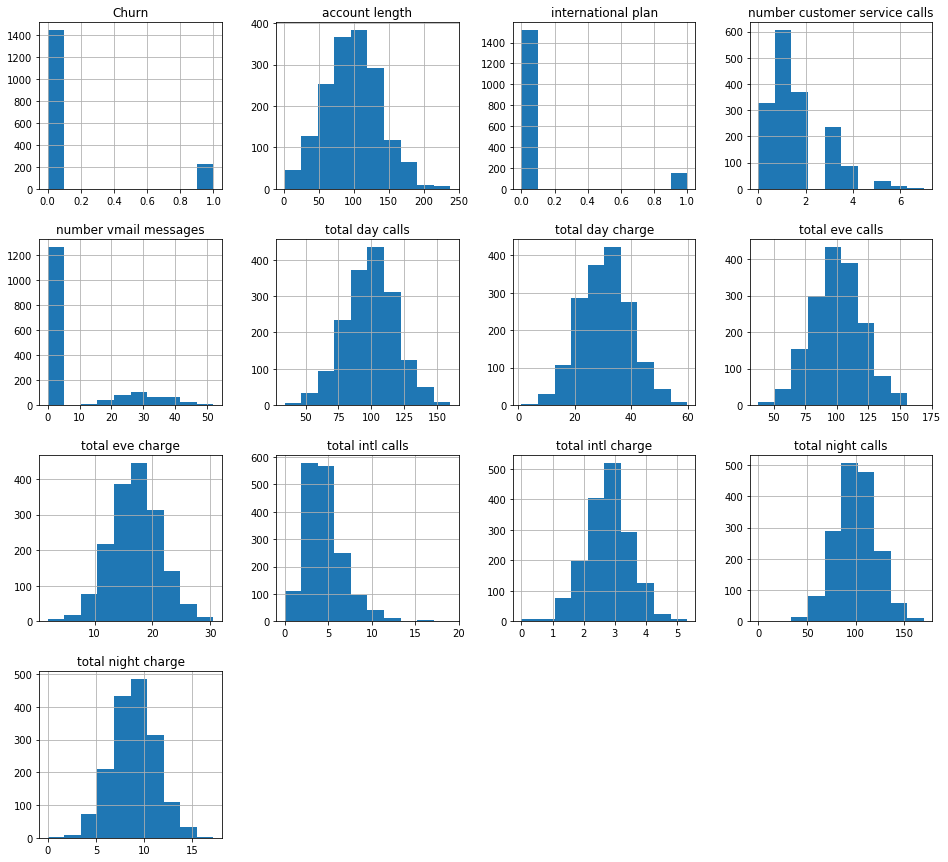

In [51]:
#Feature Scaling:

test.hist(figsize=(16,15))

In [52]:
test.columns

Index(['account length', 'international plan', 'number vmail messages',
       'total day calls', 'total day charge', 'total eve calls',
       'total eve charge', 'total night calls', 'total night charge',
       'total intl calls', 'total intl charge',
       'number customer service calls', 'Churn'],
      dtype='object')

In [53]:
#test['number customer service calls'] =test['number customer service calls'].astype('int')

#test['number vmail messages'] =test['number vmail messages'].astype('int')

#test['total intl calls'] = test['total intl calls'].astype('int')


In [54]:
# Normalisation for Train Dataset
test_skew_vars= ['number customer service calls','number vmail messages','total intl calls']
minVec = test[test_skew_vars].min().copy()
maxVec = test[test_skew_vars].max().copy()
test[test_skew_vars] = (test[test_skew_vars]-minVec)/(maxVec-minVec)


#Performing feature scaling on test data:
test_scaling_vars=['account length','total day calls', 'total day charge', 'total eve calls',
                   'total eve charge', 'total night calls', 'total night charge', 'total intl charge',]

for i in test_scaling_vars:
    print(i)
    test[i]=(test[i]-test[i].mean())/test[i].std()


account length
total day calls
total day charge
total eve calls
total eve charge
total night calls
total night charge
total intl charge


In [55]:
test.describe(include="all")

,account length,international plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,number customer service calls,Churn
count,1.667000e+03,1667.000000,1667.000000,1.667000e+03,1.667000e+03,1.667000e+03,1.667000e+03,1.667000e+03,1.667000e+03,1667.000000,1.667000e+03,1667.000000,1667.000000
mean,1.251748e-16,0.089982,0.135919,-2.450882e-17,1.471728e-15,-3.719114e-16,-6.264269e-15,-2.839723e-16,2.239827e-15,0.228775,-8.500732e-15,0.226498,0.134373
std,1.000000e+00,0.286242,0.254524,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.128750,1.000000e+00,0.184026,0.341155
min,-2.478294e+00,0.000000,0.000000,-3.374381e+00,-3.313581e+00,-3.174689e+00,-3.535540e+00,-4.804758e+00,-3.954241e+00,0.000000,-3.820745e+00,0.000000,0.000000
25%,-6.762985e-01,0.000000,0.000000,-6.838648e-01,-7.121862e-01,-6.285962e-01,-6.782358e-01,-6.536662e-01,-6.496989e-01,0.157895,-6.372724e-01,0.142857,0.000000
50%,-1.641265e-02,0.000000,0.000000,-1.123583e-02,-6.061421e-03,-1.753398e-02,7.985740e-03,-2.617560e-02,-2.008760e-03,0.210526,3.509900e-02,0.142857,0.000000
75%,6.942336e-01,0.000000,0.000000,6.613932e-01,6.532115e-01,6.444501e-01,6.438531e-01,6.495835e-01,6.677117e-01,0.263158,6.251392e-01,0.285714,0.000000
max,3.536819e+00,1.000000,1.000000,3.144946e+00,3.227834e+00,3.496074e+00,3.172099e+00,3.400889e+00,3.610957e+00,1.000000,3.479287e+00,1.000000,1.000000


In [56]:
#Looking at the proportion of target class in test:
test["Churn"].value_counts()

0    1443
1     224
Name: Churn, dtype: int64

In [57]:
test.dtypes

account length                   float64
international plan                 int32
number vmail messages            float64
total day calls                  float64
total day charge                 float64
total eve calls                  float64
total eve charge                 float64
total night calls                float64
total night charge               float64
total intl calls                 float64
total intl charge                float64
number customer service calls    float64
Churn                              int32
dtype: object

In [58]:
#Thus, prepared the test data.

In [59]:
train.head()

,account length,international plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,number customer service calls,Churn
0,0.701970,0,0.50,0.488626,1.618559,-0.053074,-0.079093,-0.474867,0.890671,0.222222,-0.120632,0.333333,0
1,0.168013,0,0.52,1.162740,-0.350087,0.154982,-0.117474,0.154986,1.090918,0.222222,1.307249,0.333333,0
2,0.930808,0,0.00,0.696046,1.205815,0.519078,-1.633533,0.207474,-0.788675,0.444444,0.721818,0.000000,0
4,-0.645635,1,0.00,0.644191,-0.252773,1.143244,-1.079404,1.099765,-0.292608,0.222222,-0.077796,1.000000,0
5,0.447705,1,0.00,-0.133633,0.825508,0.050954,0.393476,0.942302,0.057825,0.555556,-1.548513,0.000000,0


# MODEL BUILDING USING CLASIFICATION ALGORITHMS:

In [60]:
#Creating train_x, train_y, test_x, test_y for modeling:

#train_x = predictors in train
#train_y = target in tarin
#test_x = predictors in test
#test_y = target in test

train_x=train.columns[0:12]
train_y=train["Churn"]
test_x=test.columns[0:12]
test_y=test["Churn"]

# Logistic Regression

In [61]:
import statsmodels.api as sm

from sklearn.metrics import confusion_matrix, classification_report

In [62]:
model_glm=sm.Logit(train_y,train[train_x]).fit()

model_glm.summary()

Optimization terminated successfully.
         Current function value: 0.287764
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 2797
Model:                          Logit   Df Residuals:                     2785
Method:                           MLE   Df Model:                           11
Date:                Sat, 16 Mar 2019   Pseudo R-squ.:                  0.1629
Time:                        23:44:25   Log-Likelihood:                -804.87
converged:                       True   LL-Null:                       -961.51
                                        LLR p-value:                 1.402e-60
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
account length                    0.0804      0.064      1.253      0.210      -0.045       0.206
international plan                1.9480      0.180     10.839      0.000       1.596       2.300
number vmail messages            -2.8281      0.308     -9.170      0.000      -3.433      -2.224
total day calls                   0.0125      0.063      0.201      0.841      -0.110       0.135
total day charge                  0.9735      0.072     13.444      0.000       0.832       1.115
total eve calls                  -0.0347      0.065     -0.536      0.592      -0.162       0.092
total eve charge                  0.4898      0.066      7.405      0.000       0.360       0.619
total night calls                 0.0607      0.064      0.947      0.343      -0.065       0.186
total night charge                0.2548      0.065      3.928      0.000       0.128       0.382
total intl calls                 -4.5128      0.273    -16.527      0.000      -5.048      -3.978
total intl charge                 0.2444      0.065      3.757      0.000       0.117       0.372
number customer service calls    -1.7870      0.177    -10.118      0.000      -2.133      -1.441
=================================================================================================
"""

# Prediction on test data using Logistic Regression model

In [63]:
test['prediction_glm'] = model_glm.predict(test[test_x])

test['prediction_glm']

0       0.039162
1       0.249540
2       0.523551
3       0.447572
4       0.110167
5       0.212537
6       0.201927
7       0.268435
8       0.020726
9       0.048366
10      0.031241
11      0.098687
12      0.152893
13      0.009805
14      0.223426
15      0.438287
16      0.070759
17      0.632072
18      0.038258
19      0.109256
20      0.021119
21      0.034922
22      0.006789
23      0.052165
24      0.214530
25      0.315710
26      0.036014
27      0.550466
28      0.439574
29      0.080679
          ...   
1637    0.416637
1638    0.041780
1639    0.139764
1640    0.596048
1641    0.066936
1642    0.112202
1643    0.324384
1644    0.510096
1645    0.163599
1646    0.365144
1647    0.447421
1648    0.014258
1649    0.036360
1650    0.135606
1651    0.192431
1652    0.040256
1653    0.317516
1654    0.044129
1655    0.212894
1656    0.287929
1657    0.524871
1658    0.786744
1659    0.291650
1660    0.050214
1661    0.050900
1662    0.094035
1663    0.506455
1664    0.1193

# Evaluation of Logistic Regression

In [64]:
#Confusion Matrix of Logistic Regression model:

cm_lm=confusion_matrix(test_y,test["prediction_glm"].round())

cm_lm

array([[1308,  135],
       [ 106,  118]], dtype=int64)

In [65]:
#FNR:

(106*100)/(106+118)

47.32142857142857

In [66]:
#Accuracy:

(1308+118)/(1308+135+106+118)

0.8554289142171566

0    1443
1     224
Name: Churn, dtype: int64
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1443
           1       0.47      0.53      0.49       224

   micro avg       0.86      0.86      0.86      1667
   macro avg       0.70      0.72      0.71      1667
weighted avg       0.86      0.86      0.86      1667



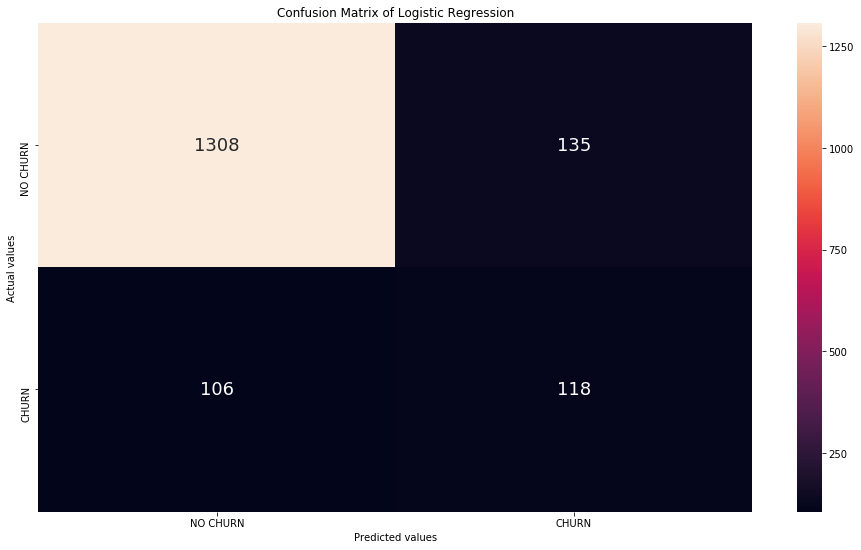

In [67]:
print(test["Churn"].value_counts())

print(classification_report(test["Churn"], test["prediction_glm"].round()))

ax= plt.subplot()
sns.heatmap(cm_lm, annot=True, annot_kws={"size": 18}, fmt="d", ax = ax);
ax.set_xlabel('Predicted values');ax.set_ylabel('Actual values'); 
ax.set_title('Confusion Matrix of Logistic Regression'); 
ax.xaxis.set_ticklabels(['NO CHURN', 'CHURN']); ax.yaxis.set_ticklabels(['NO CHURN', 'CHURN']);

In [68]:
#test["prediction1"]=np.where(test["prediction_lm"]>0.5,1,0)
#test.head()

AUC: 0.717
[0.         0.09355509 1.        ]
[0.         0.52678571 1.        ]


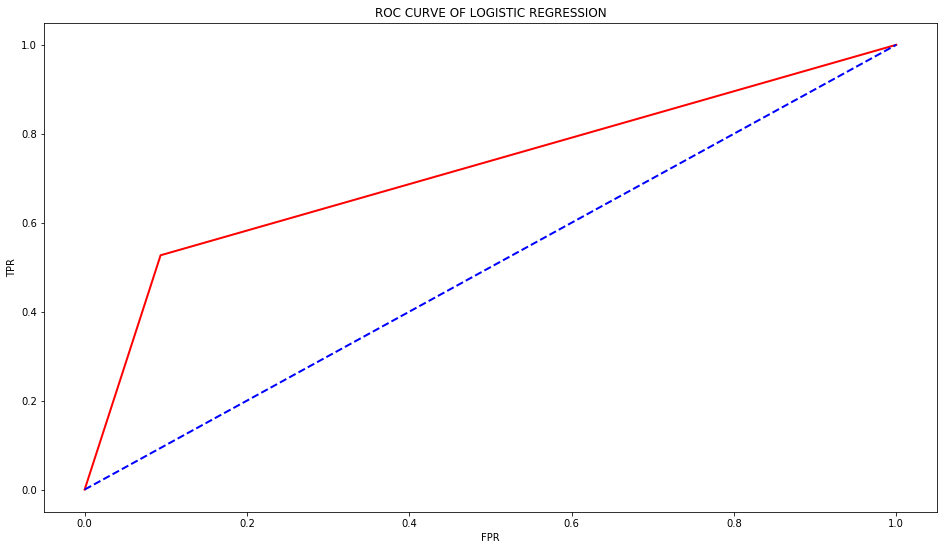

In [69]:
#ROC Curve to evaluate the model:

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

#Computing auc
auc_glm = roc_auc_score(test["Churn"], test["prediction_glm"].round())
print('AUC: %.3f' % auc_glm)

#Computing false and true positive rates
fpr, tpr,_=roc_curve(test["Churn"],test["prediction_glm"].round(),drop_intermediate=False)
print(fpr)
print(tpr)

plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve')

##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')

##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE OF LOGISTIC REGRESSION')
plt.show()

# Random Forest

In [70]:
#Model building using Random Forest:
from sklearn.ensemble import RandomForestClassifier

In [71]:
model_rf=RandomForestClassifier(n_estimators=500).fit(train[train_x],train_y)
model_rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Prediction on test using Random Forest model:

In [72]:
#Prediction on test data using model_rf:
test['prediction_rf']=model_rf.predict(test[test_x])
test['prediction_rf']

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      1
29      0
       ..
1637    0
1638    0
1639    0
1640    0
1641    0
1642    0
1643    0
1644    0
1645    0
1646    0
1647    0
1648    0
1649    0
1650    0
1651    0
1652    0
1653    0
1654    0
1655    0
1656    0
1657    0
1658    1
1659    0
1660    0
1661    0
1662    0
1663    0
1664    0
1665    0
1666    0
Name: prediction_rf, Length: 1667, dtype: int32

# Evaluation of Random Forest model

In [73]:
#Confusion Matrix:
cm_rf=confusion_matrix(test["Churn"],test["prediction_rf"])
cm_rf

array([[1417,   26],
       [ 111,  113]], dtype=int64)

In [74]:
#FNR:
(110*100)/(110+114)

49.107142857142854

In [75]:
#Accuracy:
(1417+115)/(1417+26+109+115)

0.9190161967606478

0    1443
1     224
Name: Churn, dtype: int64
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1443
           1       0.81      0.50      0.62       224

   micro avg       0.92      0.92      0.92      1667
   macro avg       0.87      0.74      0.79      1667
weighted avg       0.91      0.92      0.91      1667



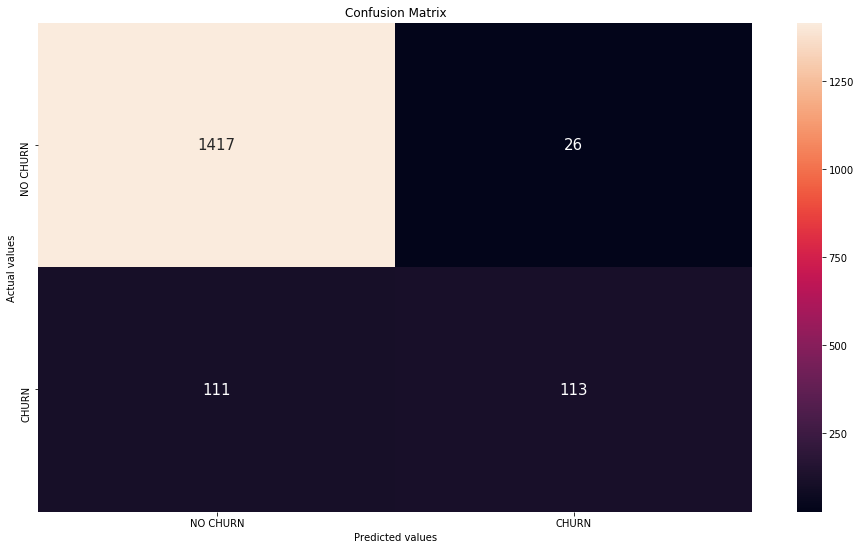

In [76]:
print(test["Churn"].value_counts())

print(classification_report(test["Churn"], test["prediction_rf"].round()))

ax= plt.subplot()
sns.heatmap(cm_rf, annot=True, annot_kws={"size": 15}, fmt="d", ax = ax);
ax.set_xlabel('Predicted values');ax.set_ylabel('Actual values'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['NO CHURN', 'CHURN']); ax.yaxis.set_ticklabels(['NO CHURN', 'CHURN']);

In [77]:
# Calculate auc
auc_value = roc_auc_score(test["Churn"], test["prediction_rf"])
auc_value

0.7432231338481338

AUC: 0.743


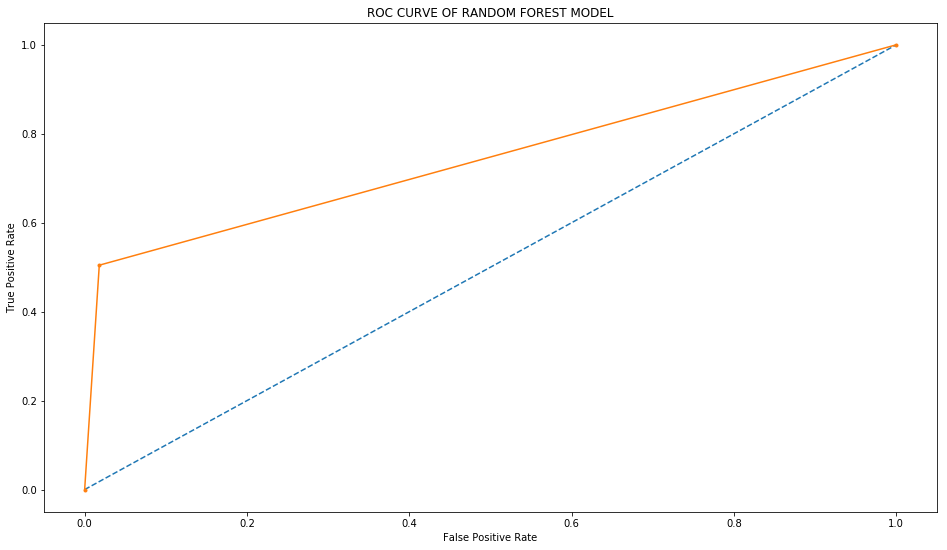

In [78]:
from sklearn.metrics import roc_auc_score

#calculate AUC
auc_rf = roc_auc_score(test["Churn"], test["prediction_rf"])
print('AUC: %.3f' % auc_rf)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(test["Churn"], test["prediction_rf"])

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE OF RANDOM FOREST MODEL')

# show the plot
plt.show()

# Finally, Looking at the importance of each feature in Random Forest model

In [79]:
#Importance of features based on their impact on target:
pd.DataFrame({'Variable':train[train_x].columns,
              'Importance':model_rf.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
4,total day charge,0.273950
1,international plan,0.111997
6,total eve charge,0.111175
10,total intl charge,0.091218
9,total intl calls,0.069875
8,total night charge,0.068273
0,account length,0.053298
2,number vmail messages,0.051628
7,total night calls,0.051543
3,total day calls,0.051116


In [80]:
###############################################################################################################################